In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pickle
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import glob
import random
import tensorflow as tf
import seaborn as sns
import re

Mounted at /content/gdrive


In [ ]:
pip install keras-tuner

     |████████████████████████████████| 133 kB 5.0 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pickle
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import glob
import random
import tensorflow as tf
import seaborn as sns
import re
import tarfile
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.optimizers import adam_v2
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Sequential
import keras_tuner as kt
from keras import optimizer_v2
from sklearn.metrics import classification_report

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train_annotation = pickle.load(open('/content/gdrive/MyDrive/Colab_Notebooks/Vehicle_Reidentification/train_annotation.pkl', 'rb'))
test_annotation = pickle.load(open('/content/gdrive/MyDrive/Colab_Notebooks/Vehicle_Reidentification/test_annotation.pkl', 'rb'))
test_dev_annotation = pickle.load(open('/content/gdrive/MyDrive/Colab_Notebooks/Vehicle_Reidentification/test_dev_annotation.pkl', 'rb'))

In [ ]:
file = tarfile.open('/content/gdrive/MyDrive/Colab_Notebooks/Vehicle_Reidentification/images_train.tar')
file.extractall('/content/vehicle_images')
file.close()

In [ ]:
file = tarfile.open('/content/gdrive/MyDrive/Colab_Notebooks/Vehicle_Reidentification/images_test.tar')
file.extractall('/content/vehicle_images')
file.close()

In [ ]:
file = tarfile.open('/content/gdrive/MyDrive/Colab_Notebooks/Vehicle_Reidentification/images_dev.tar')
file.extractall('/content/vehicle_images')
file.close()

In [ ]:
import os
import shutil

src = '/content/vehicle_images/images_train/'
dest = '/content/vehicle_images/'
allfiles = os.listdir(src)
for f in allfiles:
    shutil.move(src + f, dest + f)

In [ ]:
src = '/content/vehicle_images/images_test/'
dest = '/content/vehicle_images/'
allfiles = os.listdir(src)
for f in allfiles:
    shutil.move(src + f, dest + f)

In [ ]:
src = '/content/vehicle_images/images_dev/'
dest = '/content/vehicle_images/'
allfiles = os.listdir(src)
for f in allfiles:
    shutil.move(src + f, dest + f)

In [ ]:
train_annotation.keys(), test_annotation.keys(), test_dev_annotation.keys()

(dict_keys(['train_im_names', 'wheel_label', 'type_label', 'color_label', 'luggage_label', 'd_part_label', 'sky_label', 'bumper_label']),
 dict_keys(['query_order', 'wheel_label', 'type_label', 'gallery_order', 'color_label', 'luggage_label', 'd_part_label', 'test_im_names', 'bumper_label', 'sky_label']),
 dict_keys(['query_order', 'wheel_label', 'dev_im_names', 'type_label', 'color_label', 'luggage_label', 'd_part_label', 'sky_label', 'bumper_label', 'gallery_order']))

In [ ]:
annotations = {}
for ind in train_annotation['type_label']:
    img_name = train_annotation['train_im_names'][ind]
    annotations[img_name] = train_annotation['type_label'][ind]

In [ ]:
annotations.update(test_annotation['type_label'])
annotations.update(test_dev_annotation['type_label'])

In [ ]:
print(annotations['00000207_0002_00000001.jpg'])

2


In [ ]:
Counter(annotations.values())

Counter({0: 61227, 1: 5551, 2: 42675, 3: 2834, 4: 15398, 5: 9567, 6: 158})

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

strategy = {0:100, 1:100, 2:100, 3:100, 4:100, 5:100, 6:100}
undersample = RandomUnderSampler(sampling_strategy = strategy)
X, y = np.array(list(annotations.keys())), np.array(list(annotations.values()))
X = X.reshape(-1,1)
y = y.reshape(-1,1)
annot_name, annot_label = undersample.fit_resample(X, y)
Counter(annot_label)

Counter({0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100})

In [ ]:
annot_name

array([['ISA8N3B8_C1.jpg'],
       ['1XEZ16CA_C2.jpg'],
       ['INM01RV1_C1.jpg'],
       ['ZFC1WNBT_C1.jpg'],
       ['FOOBZIYF_C1.jpg'],
       ['FPJQ56O0_C1.jpg'],
       ['UCROXPPQ_C1.jpg'],
       ['GUJCNAUZ_C1.jpg'],
       ['PN4PN1PK_C2.jpg'],
       ['00001316_0001_00000002.jpg'],
       ['PF9EBC3W_C1.jpg'],
       ['KMQFH50I_C1.jpg'],
       ['KW5DUE22_C1.jpg'],
       ['WIGXOBJT_C2.jpg'],
       ['YJ1IFYML_C2.jpg'],
       ['CWLUUPPS_C2.jpg'],
       ['OMBSSD8B_C1.jpg'],
       ['ZSCRB504_C2.jpg'],
       ['2XRHSFNZ_C2.jpg'],
       ['QZIWBFW1_C2.jpg'],
       ['31KRUKMI_C1.jpg'],
       ['63UMEFPB_C2.jpg'],
       ['BL2WYWVV_C1.jpg'],
       ['2O14DOQ8_C2.jpg'],
       ['JDHCOPD0_C2.jpg'],
       ['CXE8TIPD_C1.jpg'],
       ['Y3XHUFLD_C1.jpg'],
       ['56KFSY6Z_C1.jpg'],
       ['NVL4JY7R_C2.jpg'],
       ['OG63Q1G0_C1.jpg'],
       ['N7YWG43T_C2.jpg'],
       ['77UDPW8A_C1.jpg'],
       ['8FICTWVV_C1.jpg'],
       ['O7ZXWKFE_C2.jpg'],
       ['HQBVLM2C_C2.jpg'],
       ['

In [ ]:
annot_label[0]

0

In [ ]:
w = 0
h = 0
path = '/content/vehicle_images/'
for name in annot_name:
    img_name = path+name[0]
    img = cv2.imread(img_name)
    he, wi, co = img.shape
    w += wi
    h += he

In [ ]:
height = h/6000
width = w/6000
print(f'height: {height}, width: {width}')

height: 30.740166666666667, width: 45.54866666666667


In [ ]:
data, label = [], []
path = '/content/vehicle_images/'
for i in range(600):
    img_name = path+annot_name[i][0]
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (int(height), int(width)))
    data.append(img)
    label.append(annot_label[i])

In [ ]:
len(data), len(label)

(600, 600)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42, stratify=label)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [ ]:
for i in range(len(X_train)):
  X_train[i]=cv2.normalize(X_train[i], None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
for i in range(len(X_val)):
  X_val[i]=cv2.normalize(X_val[i], None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
for i in range(len(X_test)):
  X_test[i]=cv2.normalize(X_test[i], None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX) 

In [ ]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [ ]:
d1,d2,d3,d4 = X_train.shape
X_train = X_train.reshape((d1, d2*d3*d4))
d1,d2,d3,d4 = X_val.shape
X_val = X_val.reshape((d1, d2*d3*d4))
d1,d2,d3,d4 = X_test.shape
X_test = X_test.reshape((d1, d2*d3*d4))

In [ ]:
#Hyperparameter Tuning 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
p=[1,2]
#Convert to dictionary
hyperparameters = dict( n_neighbors=[1,3,5], p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=5)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 3


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
KNN=KNeighborsClassifier(n_neighbors=3,metric="manhattan")
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='macro')
recall=recall_score(y_test,y_pred,average='macro')
f1score=f1_score(y_test,y_pred,average='macro')
print(f'Accuracy={accuracy},Precision={precision},Recall={recall},F1Score={f1_score}')

Accuracy=0.275,Precision=0.3254668196047506,Recall=0.27499999999999997,F1Score=<function f1_score at 0x7f6c04195710>


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.25      0.18        20
           1       0.21      0.30      0.24        20
           2       0.23      0.15      0.18        20
           3       0.48      0.60      0.53        20
           4       0.40      0.20      0.27        20
           5       0.50      0.15      0.23        20

    accuracy                           0.28       120
   macro avg       0.33      0.27      0.27       120
weighted avg       0.33      0.28      0.27       120



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Sedan', 'Hatchback', 'SUV', 'Bus', 'Lorry', 'Truck'], 
                     columns = ['Sedan', 'Hatchback', 'SUV', 'Bus', 'Lorry', 'Truck'])

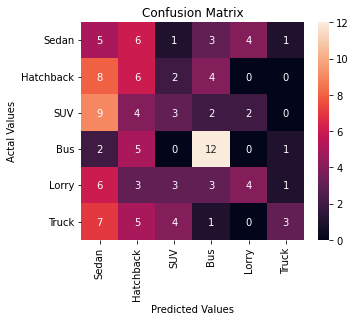

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

strategy = {0:86, 1:95, 2:78, 3:90, 4:83, 5:74, 6:100}
undersample = RandomUnderSampler(sampling_strategy = strategy)
X, y = np.array(list(annotations.keys())), np.array(list(annotations.values()))
X = X.reshape(-1,1)
y = y.reshape(-1,1)
annot_name, annot_label = undersample.fit_resample(X, y)
Counter(annot_label)

Counter({0: 86, 1: 95, 2: 78, 3: 90, 4: 83, 5: 74, 6: 100})

In [ ]:
w = 0
h = 0
path = '/content/vehicle_images/'
for name in annot_name:
    img_name = path+name[0]
    img = cv2.imread(img_name)
    he, wi, co = img.shape
    w += wi
    h += he

In [ ]:
height = h/6000
width = w/6000
print(f'height: {height}, width: {width}')

height: 26.211333333333332, width: 40.55533333333333


In [ ]:
data, label = [], []
path = '/content/vehicle_images/'
for i in range(501):
    img_name = path+annot_name[i][0]
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (int(height), int(width)))
    data.append(img)
    label.append(annot_label[i])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42, stratify=label)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [ ]:
for i in range(len(X_train)):
  X_train[i]=cv2.normalize(X_train[i], None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
for i in range(len(X_val)):
  X_val[i]=cv2.normalize(X_val[i], None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
for i in range(len(X_test)):
  X_test[i]=cv2.normalize(X_test[i], None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX) 

In [ ]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [ ]:
d1,d2,d3,d4 = X_train.shape
X_train = X_train.reshape((d1, d2*d3*d4))
d1,d2,d3,d4 = X_val.shape
X_val = X_val.reshape((d1, d2*d3*d4))
d1,d2,d3,d4 = X_test.shape
X_test = X_test.reshape((d1, d2*d3*d4))

In [ ]:
#Hyperparameter Tuning 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
p=[1,2]
#Convert to dictionary
hyperparameters = dict( n_neighbors=[1,3,5], p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=5)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
KNN=KNeighborsClassifier(n_neighbors=1,metric="manhattan")
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='macro')
recall=recall_score(y_test,y_pred,average='macro')
f1score=f1_score(y_test,y_pred,average='macro')
print(f'Accuracy={accuracy},Precision={precision},Recall={recall},F1Score={f1_score}')

Accuracy=0.297029702970297,Precision=0.2481465293965294,Recall=0.28266182203875706,F1Score=<function f1_score at 0x7f6c04195710>


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.29      0.29        17
           1       0.31      0.42      0.36        19
           2       0.09      0.06      0.07        16
           3       0.44      0.39      0.41        18
           4       0.38      0.53      0.44        17
           5       0.00      0.00      0.00        14

    accuracy                           0.30       101
   macro avg       0.25      0.28      0.26       101
weighted avg       0.26      0.30      0.27       101



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Sedan', 'Hatchback', 'SUV', 'Bus', 'Lorry', 'Truck'], 
                     columns = ['Sedan', 'Hatchback', 'SUV', 'Bus', 'Lorry', 'Truck'])

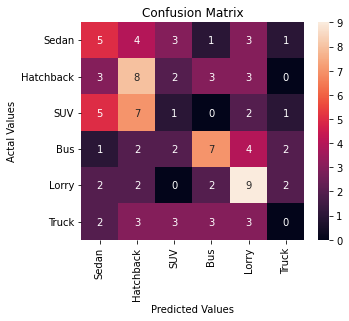

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()